In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("./data/binary_text_classification_dataset.csv")

In [3]:
df.head()

,Text,Label
0,Terrible service and rude staff.,0
1,Highly recommend this to everyone!,1
2,I regret buying this.,0
3,Fantastic service and friendly staff.,1
4,Highly recommend this to everyone!,1


In [4]:
df.shape

(500, 2)

In [6]:
df["Label"].value_counts()

Label
0    250
1    250
Name: count, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df["Text"], df["Label"], test_size=0.1, random_state=1)

In [11]:

X_train.shape, y_train.shape

((450,), (450,))

In [26]:
X_test[:10], y_test[:10]

(304           The product broke after one use.
 340         This is the worst experience ever.
 47       Awful experience, never buying again.
 67     I'm very disappointed with the quality.
 479    This does not meet expectations at all.
 485    This is exactly what I was looking for.
 310             This exceeded my expectations.
 31            The product broke after one use.
 249             This exceeded my expectations.
 90              Horrible! Would not recommend.
 Name: Text, dtype: object,
 304    0
 340    0
 47     0
 67     0
 479    0
 485    1
 310    1
 31     0
 249    1
 90     0
 Name: Label, dtype: int64)

In [29]:
X_train[0], y_train[0]

('Terrible service and rude staff.', 0)

In [31]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
max_vocab = 100
tokenizer = Tokenizer(num_words=max_vocab)

tokenizer.fit_on_texts(X_train)

In [36]:
wordidx = tokenizer.word_index

vocab_size = len(wordidx)

In [37]:
print(f"The size of vocabulary is {vocab_size}")

The size of vocabulary is 71


In [40]:
wordidx["the"]

2

In [38]:
train_seq = tokenizer.texts_to_sequences(X_train)

train_seq[0]

[24, 3, 25, 10, 8]

In [41]:
test_seq = tokenizer.texts_to_sequences(X_test)

test_seq[0]

[2, 5, 45, 46, 47, 48]

In [43]:
sequence_length = [len(seq) for seq in train_seq]
max_seq_length = max(sequence_length)

print(max_seq_length)

8


In [45]:
pad_train = pad_sequences(train_seq, maxlen=max_seq_length, padding="post")
pad_train.shape

(450, 8)

In [46]:
pad_test = pad_sequences(test_seq, maxlen=max_seq_length, padding="post")
pad_test.shape

(50, 8)

In [47]:
# model

from tensorflow.keras.layers import Input, Dense, Embedding, LSTM, GlobalMaxPooling1D
from tensorflow.keras.models import Model

D = 32
M = 16

i = Input(shape=(max_seq_length, ))
x = Embedding(vocab_size + 1, D)(i)
x = LSTM(M, return_sequences=True)(x)
x = GlobalMaxPooling1D()(x)
x = Dense(1, activation="sigmoid")(x)

model = Model(i, x)

In [48]:
model.compile(
    optimizer="adam",
    loss=tf.losses.BinaryCrossentropy(),
    metrics=["accuracy"]
)

In [49]:
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 8)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding (Embedding)           │ (None, 8, 32)          │         2,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 8, 16)          │         3,136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 16)             │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,457 (21.32 KB)

 Trainable params: 5,457 (21.32 KB)

 Non-trainable params: 0 (0.00 B)

In [50]:
model_history = model.fit(pad_train, y_train, validation_data=(pad_test, y_test), epochs=10)

Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.7798 - loss: 0.6889 - val_accuracy: 0.9600 - val_loss: 0.6754
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9801 - loss: 0.6669 - val_accuracy: 1.0000 - val_loss: 0.6479
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.6327 - val_accuracy: 1.0000 - val_loss: 0.5916
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.5564 - val_accuracy: 1.0000 - val_loss: 0.4661
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.4060 - val_accuracy: 1.0000 - val_loss: 0.2764
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.2231 - val_accuracy: 1.0000 - val_loss: 0.1541
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.1281 - val_accuracy: 1.0000 - val_loss: 0.0990
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0820 - val_accuracy: 1.0000 - val_loss

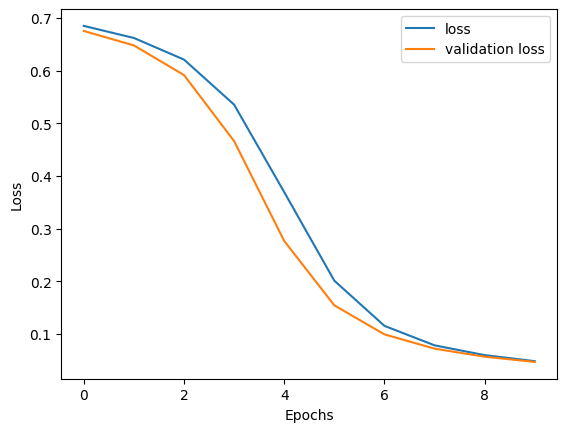

In [51]:
plt.plot(model_history.history["loss"], label="loss")
plt.plot(model_history.history["val_loss"], label="validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

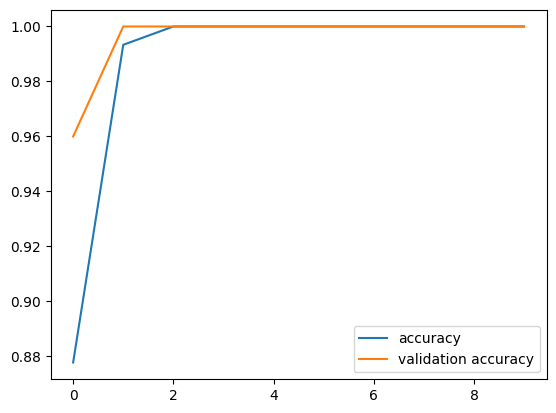

In [52]:
plt.plot(model_history.history["accuracy"], label="accuracy")
plt.plot(model_history.history["val_accuracy"], label="validation accuracy")
plt.legend()

In [53]:
input_query = "I Love this product very much."

text_seq = tokenizer.texts_to_sequences([input_query])

text_seq

[[6, 36, 1, 5, 14]]

In [54]:
text_pad = pad_sequences(text_seq, maxlen=max_seq_length, padding="post")

text_pad

array([[ 6, 36,  1,  5, 14,  0,  0,  0]])

In [55]:
logits = model.predict(text_pad)

logits

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


array([[0.9605667]], dtype=float32)

In [61]:
logits.tolist()[0][0]

0.9605666995048523

In [62]:
sentiment = "Positive" if logits > 0.5 else "Negative"

print(sentiment)

Positive


In [80]:
def predict_sentiment(text):
    text_seq = tokenizer.texts_to_sequences([text])
    text_pad = pad_sequences(text_seq, maxlen=max_seq_length, padding="post")
    logits = model.predict(text_pad)
    logits = logits.tolist()[0][0]
    sentiment = "Positive" if logits > 0.5 else "Negative"
    
    print(f"{text} is {sentiment} statement.")

In [81]:
predict_sentiment("I love this product very much.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
I love this product very much. is Positive statement.


In [82]:
predict_sentiment("I like this product.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
I like this product. is Positive statement.


In [83]:
predict_sentiment("Very helpful staff")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
Very helpful staff is Positive statement.


In [84]:
predict_sentiment("You are rude")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
You are rude is Negative statement.


In [85]:
predict_sentiment("The staff very not friendly at all.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
The staff very not friendly at all. is Negative statement.


In [87]:
predict_sentiment("I dont like your service you are not helpful.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
I dont like your service you are not helpful. is Negative statement.
